In [1]:
#purpose model mag uncertainty for point sources in the PANDAS survey
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.io.votable import parse_single_table
from popsims.plot_style import plot_style
plot_style()
%matplotlib inline

In [2]:
df=pd.read_csv('/users/caganze/result_w9sh32lw5il5lpfl.tsv', sep='\t')

In [3]:
#select objects that are point sources in g and i
df=df[np.logical_and(df.ii==-1, df.ig==-1)]

In [4]:
#mag completeness
# is >0.8 up to mag of 23

In [5]:
#columns are in the Mconanchie paper
df.columns
#columns=
df.columns

Index(['iCCD', 'di', 'g', 'i', 'ig', 'ii', 'pos', 'xg', 'yg', 'Dec', 'dg',
       'RA'],
      dtype='object')

In [6]:
df=df[np.logical_and.reduce([df.g.values <27,\
                     df.i.values<27,
                     df.i.values >15, 
                    df.g.values >15])].reset_index(drop=True)

In [7]:
df['g-i']=df.g-df.i

In [8]:
#ibata data
rgc='10_20'
path_pandas= '/users/caganze/research/stellarstreams/data/pandas/'
data=parse_single_table(path_pandas+'M31_{}kpc_new.vot'.format(rgc)).to_table().to_pandas()

In [9]:
data['g-i']=data.g0-data.i0

In [10]:
import matplotlib as mpl

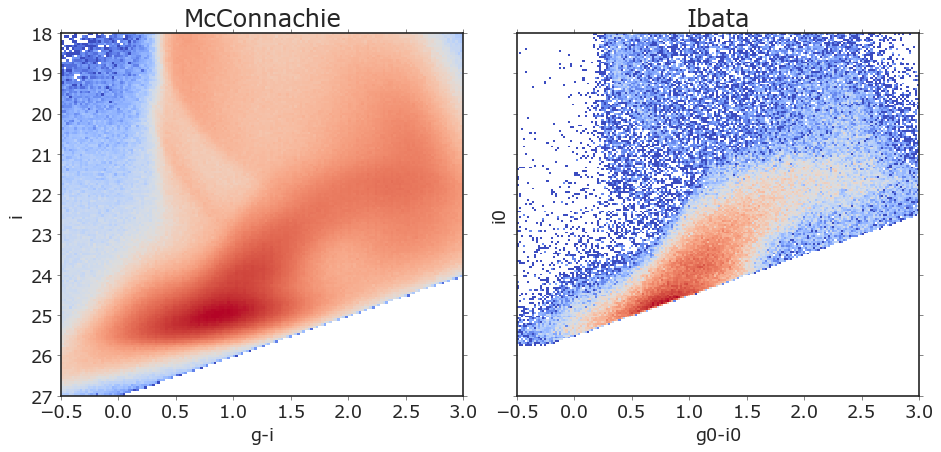

In [24]:
fig, (ax, ax1)=plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
#ax.scatter(df.g-df.i, df.i, s=1, alpha=0.1, marker=',', c='k')
ax.hist2d(df['g-i'], df.i, bins=150, cmap='coolwarm', range=[[-0.5, 3], [18, 27]],\
          norm=mpl.colors.LogNorm())
ax.invert_yaxis()

ax1.hist2d(data['g-i'], data.i0, bins=190, cmap='coolwarm', range=[[-0.5, 3], [18, 27]],\
           norm=mpl.colors.LogNorm())
ax1.invert_yaxis()

ax.set(xlabel='g-i', ylabel='i', title='McConnachie')

ax1.set(xlabel='g0-i0', ylabel='i0', title='Ibata')
plt.tight_layout()
plt.savefig('../figures/pandas_ibata_mcconnachie.jpeg')

In [12]:
def power_law(x, alpha):
    return (x-25)**alpha

In [13]:
nans= np.logical_or(np.isnan(df.g.values), np.isnan(df.g.values))

In [14]:
pol=np.poly1d(np.polyfit(df.g.values, np.log10(df.dg).values, 1))
pol_i=np.poly1d(np.polyfit(df.i.values, np.log10(df.di).values, 1))

In [15]:

#param, param_cov = curve_fit(power_law, df.g.values[~nans], df.dg.values[~nans],
#                              p0=(3), bounds=(0, 10), method ='dogbox')

In [16]:
pol

poly1d([ 0.31825664, -9.00341381])

In [17]:
pol_i

poly1d([ 0.33679263, -9.0897217 ])

In [18]:
xgrid=np.linspace(15, 27, 100)

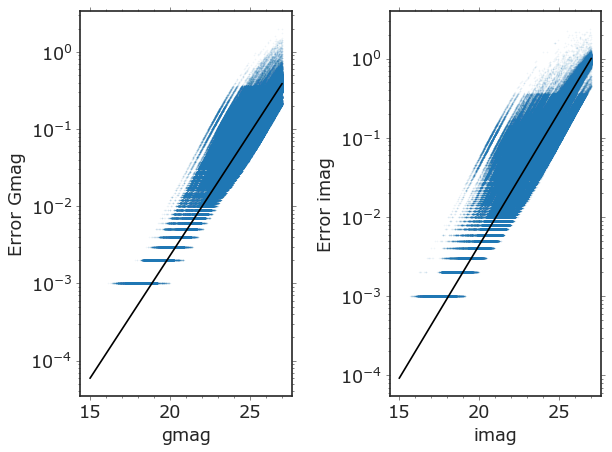

In [19]:
fig, ax=plt.subplots(ncols=2)
ax[0].scatter(df.g, df.dg, s=.1, alpha=0.1)
ax[0].plot(xgrid, 10**pol(xgrid), c='k')
#ax.plot(xgrid, (xgrid-25)**0.5, c='r', label='powerlaw')

ax[1].scatter(df.i, df.di, s=.1, alpha=0.1)
ax[1].plot(xgrid, 10**pol_i(xgrid), c='k', label='polynomial')

ax[0].set(ylabel='Error Gmag', xlabel='gmag', yscale='log')
ax[1].set(ylabel='Error imag', xlabel='imag', yscale='log')
#ax[1].axvline(25.5)
ax[0].minorticks_on()
ax[1].minorticks_on()
plt.tight_layout()
plt.savefig('../figures/mag_error_fits.jpeg')

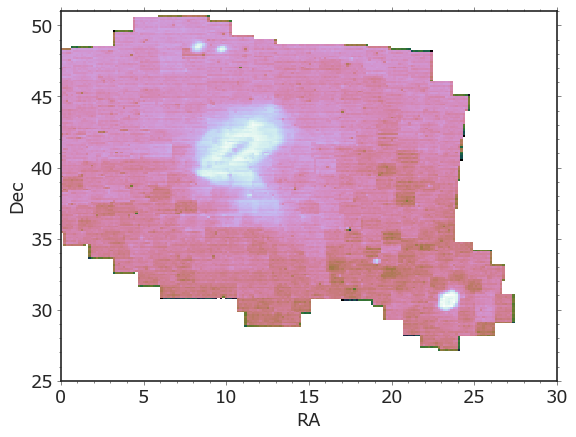

In [25]:
fig, ax=plt.subplots()
_= ax.hist2d(df.RA, df.Dec, bins=200, cmap='cubehelix', range=[[0, 30], [25, 51]], norm=mpl.colors.LogNorm())
ax.set(xlabel='RA', ylabel='Dec')
ax.minorticks_on()
plt.savefig('../figures/pandas_ibata_mcconnachie_ra_dec.jpeg')

In [26]:
#df.columns